In [1]:
#importing essential Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing the Boston housing dataset
data = pd.read_csv("Housing_prices.csv")

data.head()

,ANR,WPH,RST,PRICE
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200


In [3]:
#determining the shape of the dataset
data.shape

(489, 4)

In [4]:
#determining the structure of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ANR     489 non-null    float64
 1   WPH     489 non-null    float64
 2   RST     489 non-null    float64
 3   PRICE   489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [5]:
#determining more info about structure of the dataset 
data.describe()

,ANR,WPH,RST,PRICE
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
#independent variables
features = data.drop('PRICE', axis = 1)
print(features)

       ANR   WPH   RST
0    6.575  4.98  15.3
1    6.421  9.14  17.8
2    7.185  4.03  17.8
3    6.998  2.94  18.7
4    7.147  5.33  18.7
..     ...   ...   ...
484  6.593  9.67  21.0
485  6.120  9.08  21.0
486  6.976  5.64  21.0
487  6.794  6.48  21.0
488  6.030  7.88  21.0

[489 rows x 3 columns]


In [7]:
#dependent variable
prices = data.drop(['ANR','WPH','RST'], axis=1)
print(prices)

      PRICE
0    504000
1    453600
2    728700
3    701400
4    760200
..      ...
484  470400
485  432600
486  501900
487  462000
488  249900

[489 rows x 1 columns]


In [8]:
#values of independent variables (X) and dependent variable
X = features.values
y = prices.values

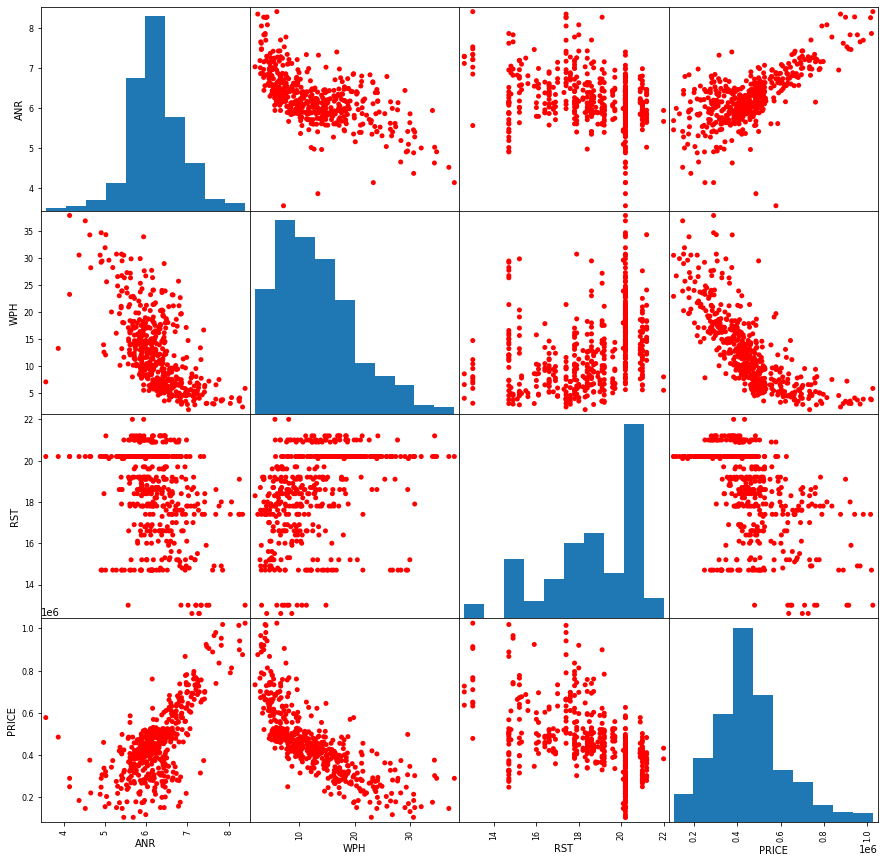

In [9]:
#scatter matrix
pd.plotting.scatter_matrix(data, c='r', alpha = 1, s=100, figsize=[15,15])
plt.show()

In [10]:
#correlation matrix
correlations = data.corr()
correlations.style.background_gradient(cmap='coolwarm')

,ANR,WPH,RST,PRICE
ANR,1.000000,-0.612033,-0.304559,0.697209
WPH,-0.612033,1.000000,0.360445,-0.760670
RST,-0.304559,0.360445,1.000000,-0.519034
PRICE,0.697209,-0.760670,-0.519034,1.000000


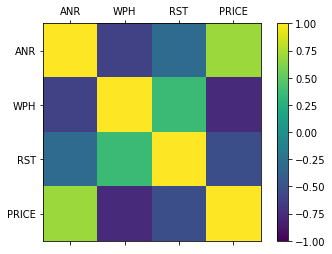

In [11]:
#visualizing the dataset using graphs
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

In [12]:
miss = data.isnull().sum()
print(miss)

ANR      0
WPH      0
RST      0
PRICE    0
dtype: int64


In [13]:
#outlier detection and calculating mean absolute error
from sklearn.covariance import EllipticEnvelope

#  function calculating mean_absolute error
def mean_absolute_error(y_true, y_pred, *,
                        sample_weight=None,
                        multioutput='uniform_average'):
  y_type, y_true, y_pred, multioutput = _check_reg_targets(
      y_true, y_pred, multioutput)
  check_consistent_length(y_true, y_pred, sample_weight)
  output_errors = np.average(np.abs(y_pred - y_true),
                              weights=sample_weight, axis=0)
  if isinstance(multioutput, str):
      if multioutput == 'raw_values':
          return output_errors
      elif multioutput == 'uniform_average':
          
          multioutput = None
  return np.average(output_errors, weights=multioutput)


iso = EllipticEnvelope(contamination=0.001)
yhat = iso.fit_predict(X)

mask = yhat!= -1
X ,y= data.values[mask, :-1], data.values[mask,-1]
X.shape

(488, 3)

In [14]:
# Splitting the Housing dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 1)

In [15]:
#determining the shape of training set
X_train.shape

(390, 3)

In [16]:
import scipy.sparse as sp
import numpy 
from sklearn.utils import validation
from sklearn.metrics import r2_score

# Calculates and returns the performance score between 
#true and predicted values based on the metric chosen.
def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

In [17]:
# Suppress matplotlib user warnings
# Necessary for newer version of matplotlib
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "sklearn")
warnings.filterwarnings("ignore", category = UserWarning, module = "")

from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

import matplotlib.pyplot as pl
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split 

#defining class "ShuffleSplit"
class ShuffleSplit:
  def __init__(self, n_splits=10, *, test_size=None, train_size=None,
                  random_state=None):
      super().__init__()
      self._default_test_size = 0.1

  def _iter_indices(self, X, y=None, groups=None):
      n_samples = _num_samples(X)
      n_train, n_test = _validate_shuffle_split(
          n_samples, self.test_size, self.train_size,
          default_test_size=self._default_test_size)

      rng = check_random_state(self.random_state)
      for i in range(self.n_splits):
          # random partition
          permutation = rng.permutation(n_samples)
          ind_test = permutation[:n_test]
          ind_train = permutation[n_test:(n_test + n_train)]
          yield ind_train, ind_test

def ModelLearning(X, y):
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit().__init__(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,7,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(estimator = DecisionTreeRegressor(max_depth=depth), X=X, y=y, cv = 5, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        lc = fig.add_subplot(2, 2, k+1)
        lc.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        lc.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        lc.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        lc.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        lc.set_title('max_depth = %s'%(depth))
        lc.set_xlabel('Number of Training Points')
        lc.set_ylabel('Score')
        lc.set_xlim([0, X.shape[0]*0.8])
        lc.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    lc.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

In [18]:
# the function calculates the performance of the model as model complexity increases.
# The learning and testing errors rates are then plotted.
def ModelComplexity(X, y):
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit().__init__(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    pl.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    pl.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    pl.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    pl.legend(loc = 'lower right')
    pl.xlabel('Maximum Depth')
    pl.ylabel('Score')
    pl.ylim([-0.05,1.05])
    pl.show()

In [19]:
#function to make predictions in a number of trials 
def PredictTrials(X, y, fitter, data):
    prices = []

    for k in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

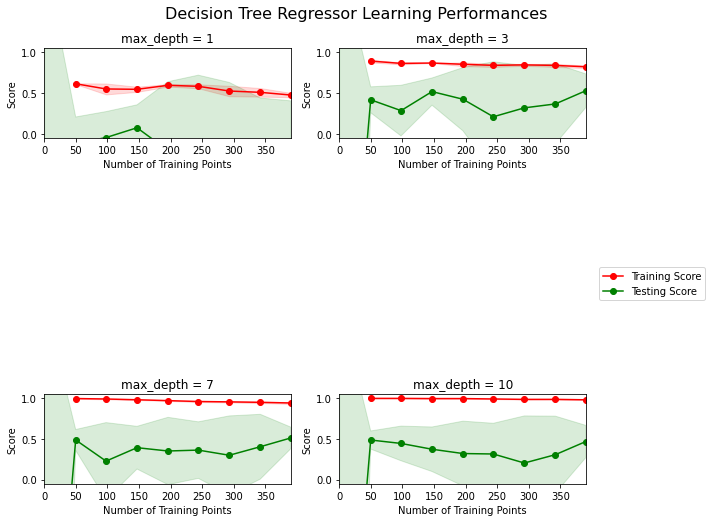

In [20]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(features, prices)

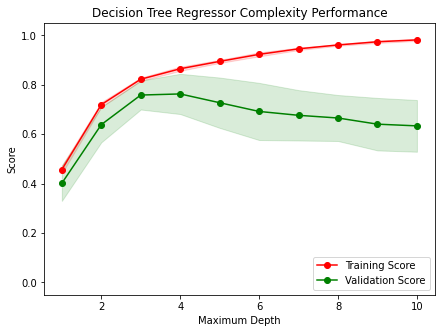

In [21]:
#calculating the model complexity
ModelComplexity(X_train, y_train)

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


# Performs grid search over the 'max_depth' parameter for a 
#decision tree regressor trained on the input data [X, y].
def fit_model(X, y):
    cv_sets = ShuffleSplit().__init__(n_splits = 10, test_size = 0.20, random_state = 0)

    regressor = DecisionTreeRegressor(random_state = 1001)

    tree_range = range(1, 11)
    params = dict(max_depth=[1,2,3,4,5,6,7,8,9,10])

    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(estimator = regressor,param_grid = params,scoring = scoring_fnc,cv = cv_sets) #.__init__(estimator = regressor,param_grid = params,scoring = scoring_fnc,cv = cv_sets)
 
    grid = grid.fit(X, y)

    return grid.best_estimator_

In [23]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# displaying the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [24]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 23, 20], # Client 2
               [8, 3, 13]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $414,400.00
Predicted selling price for Client 2's home: $234,428.57
Predicted selling price for Client 3's home: $953,925.00


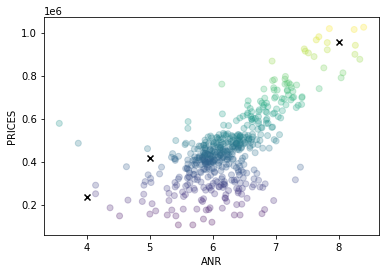

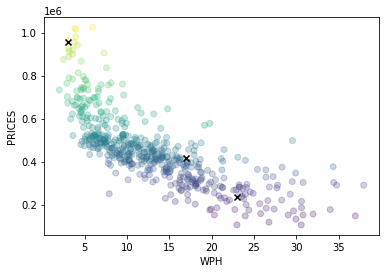

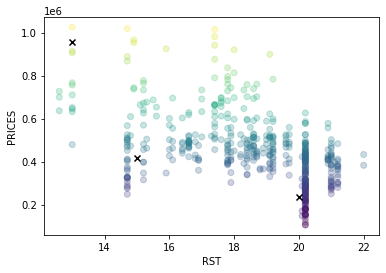

In [25]:
#visualising the variation of prices using graphs 
from matplotlib import pyplot as plt

def transpose(df):
  new_df = []
  for i in range(len(df)):
    temp = []
    for j in range(len(df[0])):
      temp.append(df[j][i])
    new_df.append(temp)
  df = new_df
  return df

clients = transpose(client_data)
pred = reg.predict(client_data)

for i, feat in enumerate(['ANR', 'WPH', 'RST']):
    plt.scatter(features[feat], prices, alpha=0.25, c=prices.values)
    plt.scatter(clients[i], pred, color='black', marker='x', linewidths=2)
    plt.xlabel(feat)
    plt.ylabel('PRICES')
    plt.show()

In [26]:
#making predictions and thus calculating the model performance using r2_score parameter
reg = fit_model(X_train, y_train)
pred = reg.predict(X_test)
score = performance_metric(y_test,pred)
print("R Squared Value: " + str(score))

R Squared Value: 0.8373057202653251


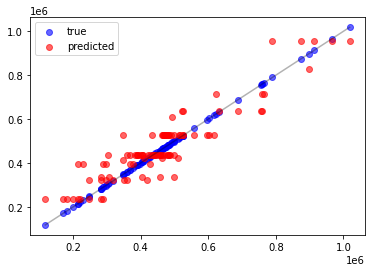

In [27]:
true, pred = y_test, pred

#Plot true values
true_handle = plt.scatter(true, true, alpha=0.6, color='blue', label='true')

#Reference line
fit = np.poly1d(np.polyfit(true,true,1))
lims = np.linspace(min(true) - 1, max(true) + 1)
plt.plot(lims, fit(lims), alpha=0.3, color='black')

#Plot predicted values
pred_handle = plt.scatter(true, pred, alpha=0.6, color='red', label='predicted')

#Legend and show
plt.legend(handles=[true_handle,pred_handle], loc='upper left')
plt.show()

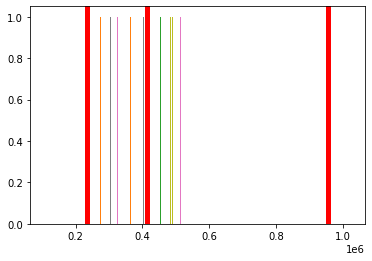

In [28]:
#visualizing the prices using histogram
import matplotlib.pyplot as plt
plt.hist(prices, bins = 20)
for price in reg.predict(client_data):
    plt.axvline(price, lw = 5, c = 'r')

In [29]:
#making predictions of prices in a number of trials (here, number of trials = 10)
PredictTrials(features, prices, fit_model, client_data) 

Trial 1: $411,000.00
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $20,959.06
